# Для твоих вопросов или комментариев оставлю такую ячейку, чтобы было удобнее взаимодействовать на проекте

# Исследование закономерностей популярных игр

В нашем распоряжении данные об играх до декабря 2016 года. Нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования:**

- Исследовать закономерности популярных игр
- На основе исследований спрогнозировать потенциально популярный продукт для инвестиций
- Собрать данные для будущей автоматизации прогнозирования

    **Ход исследования:**

     Получу данные о недвижимости из файла `'/datasets/real_estate_data.csv'`. О качестве данных не известно. Поэтому перед тем, как приступить к исследованиям, понадобится обзор данных.  
     Проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.
     
     Таким образом, моё исследование пройдет в восемь этапов:
    
    - Обзор данных.
    - Предобработка данных.
    - Исследование зависимости продаж от года выпуска игры и платформы.
    - Определение актуального периода.
    - Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.
    - Портрет пользователя каждого региона.
    - Проверка гипотез.
    - Общий вывод.

## Откройем файл с данными и изучим общую информацию. 

In [1]:
# Импортируем библиотеки 
import pandas as pd
from scipy import stats as st

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Читаем файл 
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    print('wrong somethings')

**Описание данных**:
- **Name** — название игры
- __Platform__ — платформа
- __Year_of_Release__ — год выпуска
- __Genre__ — жанр игры
- __NA_sales__ — продажи в Северной Америке (миллионы проданных копий)
- __EU_sales__ — продажи в Европе (миллионы проданных копий)
- __JP_sales__ — продажи в Японии (миллионы проданных копий)
- __Other_sales__ — продажи в других странах (миллионы проданных копий)
- __Critic_Score__ — оценка критиков (максимум 100)
- __User_Score__ — оценка пользователей (максимум 10)
- __Rating__ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
#Выведем на экран первые 30 строк
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Посмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


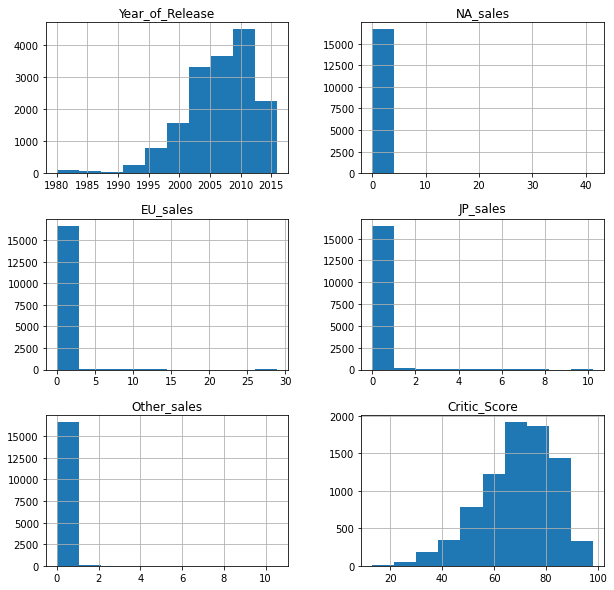

In [5]:
# Построем гистограммы
data.hist(grid=True, figsize=(10, 10));

**Выводы:**
В данных много пропущенных значений. Нужно будет сделать предобработку данных. Данные за 2016 год могут быть неполными.

## Предобработка данных

### Приведение столбцов к виду snake_case

In [6]:
# Приведение столбцов к виду snake_case
data.columns = map(str.lower, data.columns)

In [7]:
for i in ['name', 'platform', 'genre']:
    data[i] = data[data[i].isna() == False][i].str.lower()


In [8]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Пропуски и дубликаты

**Необходимо найти пропуски в данных и по возможности заполнить их.**

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

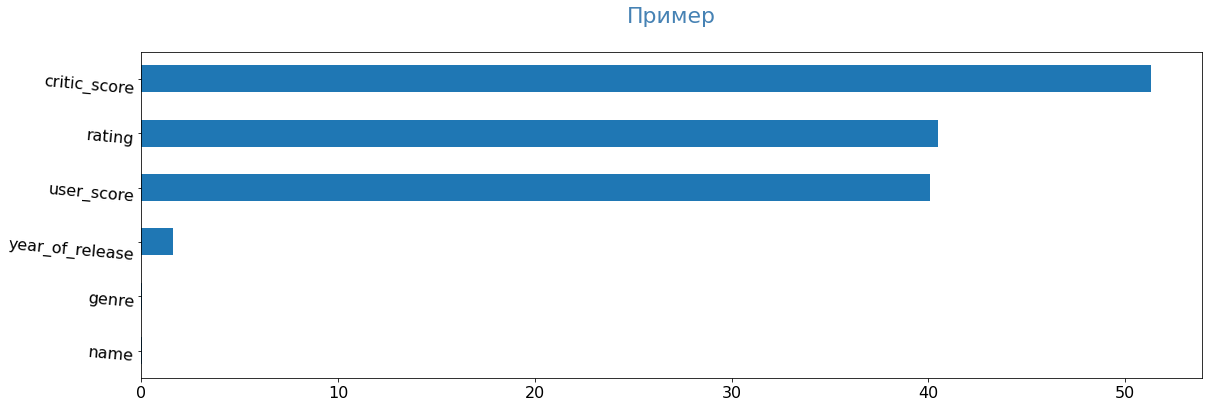

In [10]:
pass_value_barh(data)

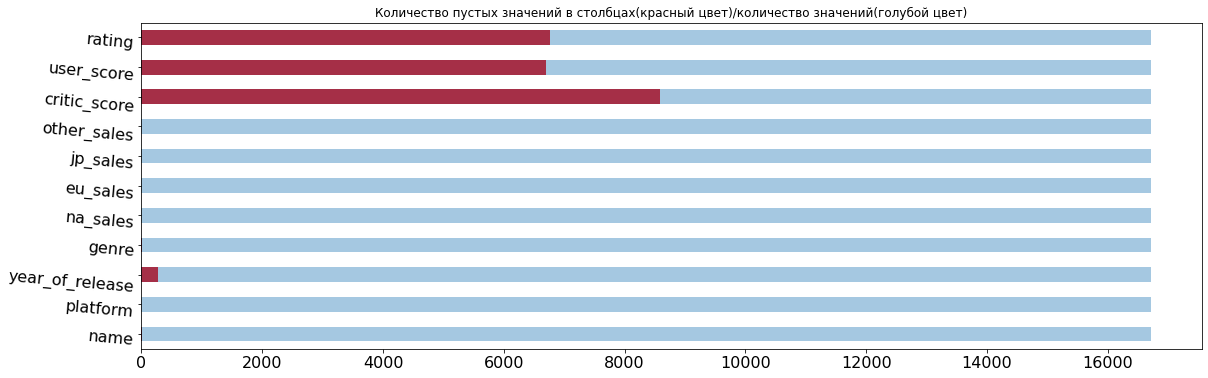

In [11]:
plt.title('Количество пустых значений в столбцах(красный цвет)/количество значений(голубой цвет)')
(data.isna().sum()).plot(kind = 'barh', figsize = (10,6), rot = -5, legend = False, fontsize = 16, color='red')
(data.isna().count()).plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16, alpha=0.4);

In [12]:
# Выведем на экран количество пропущенных для каждого столбца
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [1]:
#Проверим колличество пропусков в % 
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

NameError: name 'pd' is not defined

**Вывод:**

**Избавимся от пропусков, чья доля меньше 5%. Посмотрим пропуски в данных. Если нет критически важных значений, то удаляем строку.**
**Остальные пропуски оставляем без изменений, чтобы не искажать  данные.**

**Причинами пропусков могут быть: неверный ввод данных, сокрытие информации, повреждение файла данных при сохранении, технические проблемы.**

In [14]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
pd.set_option('display.max_rows', None)
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,call of duty 3,wii,NaN,shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,T


**Критически важных данных нет. Можно избавиться от пропусков**

In [16]:
data = data.dropna(subset=['name', 'genre', 'year_of_release'])

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Решение верное, перед удалением стоит посмотреть на записи — может они по 100 млн. продаж принесли ...

In [17]:
# Выведем на экран количество пропущенных для каждого столбца
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [18]:
# проверим дубликаты и выведем их сумму
data[data.duplicated(subset=['name', 'platform', 'year_of_release']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [19]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

**Столбец user_score имеет тип данных object, хотя предполагался float. Посмотрим с чем это связано.**

In [20]:
# Посмотрим уникальные значения user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Как видим в данных присутствует аббревиатура tbd(To Be Determined), что в переводе означает 'предстоить определить'. Т.е. оценка еще не выявлена. Таким образом, будет разумнее заменить tbd на NaN с типом float, т.к. замена на любое другое значение приведет к выбросам.**

In [21]:
#  Заменим аномальное значение на NaN
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

**Пропуски в столбце рейтинг могут быть обусловлены тем, что данные игры не оценивались в ESRB. ESRB негосударственная организация, основное направление деятельности - принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Заменим такие пропуски значением not_rated (nr)**

In [22]:
#  Заменим NaN значение на nr
data['rating'] = data['rating'].fillna('nr')

### Тип данных

**Заменим тип данных year_of_release нa int, т.к. год выпуска это целочисленное значение.**

In [23]:
data['year_of_release'] = data['year_of_release'].astype('int')

**Заменим тип данных user_score нa float, т.к. оценки в даннои столбце - это числа с плавающей запятой**

In [24]:
data['user_score'] = data['user_score'].astype('float')

In [25]:
#Посмотрим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Cуммарные продажи во всех регионах 

**Подсчитаем суммарные продажи игр во всех регионах, и  запишем в столбец `total_sales` для дальнейших исследований**

In [26]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
можно
    
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
#Проверим изменения
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,nr,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,nr,31.38


### Вывод по предобработке данных:
Были обработаны пропуски где это возможно.Типы данных были приведены к подходящему для анализа виду. Был добавлен столбец с суммарными продажами по регионам. База данных подготовлена для дальнейших исследований.


## Исследовательский анализ данных

**В ходе данного исследования мы определим потенциально прибыльные платформы. Узнаем как влияют оценки критиков и пользователей на продаваемость игр. Определим популярные среди игроков жанры. За какой характерный срок появляются новые и исчезают старые платформы**

### Cколько игр выпускалось в разные годы?

**Узнаем сколько игр выпускалось в разные годы.Также посмотрим итоговые продажы по разным годам. Данные понадобятся для определения актуального периода.**

In [28]:
# Сгруппируем данные по годам
distriburion_years = (
    data
    .groupby('year_of_release')['total_sales']
    .agg(['count', 'sum'])
)

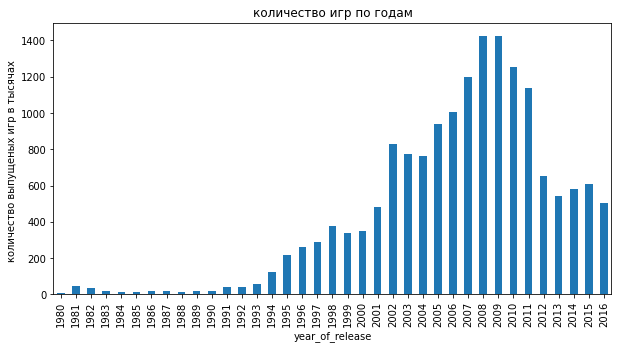

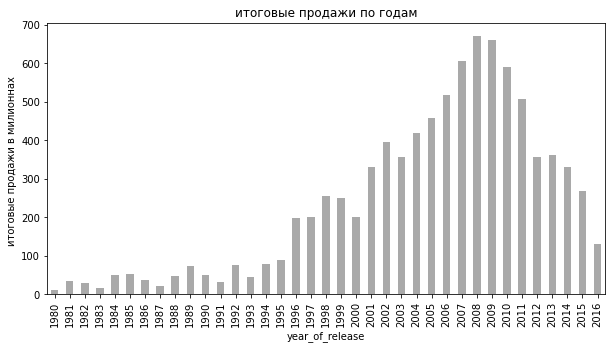

In [29]:
# Построим график игры по годам
distriburion_years['count'].plot(kind='bar', figsize=(10, 5), title='количество игр по годам', \
                        ylabel='количество выпущеных игр в тысячах ');
plt.show()
# Построим график итоговые продажи по годам
distriburion_years['sum'].plot(kind='bar', figsize=(10, 5), title='итоговые продажи по годам', \
                        ylabel='итоговые продажи в милионнах ', color='darkgrey');

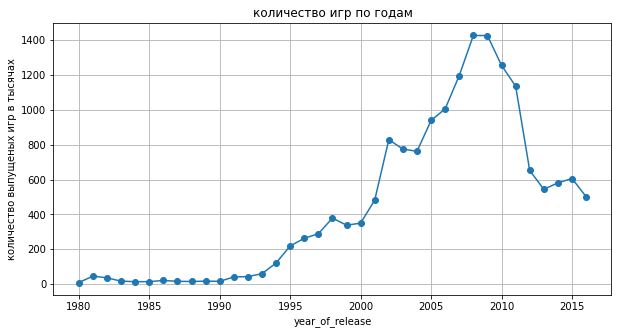

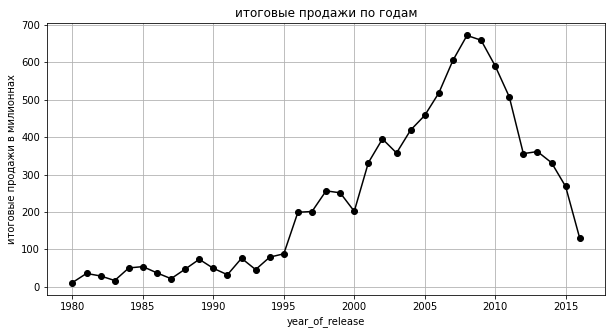

In [30]:
# Построим график игры по годам
distriburion_years['count'].plot(style='-o', figsize=(10, 5), title='количество игр по годам', \
                       ylabel='количество выпущеных игр в тысячах', grid=True);
plt.show()
# Построим график итоговые продажи по годам
distriburion_years['sum'].plot(style='-o', figsize=(10, 5), title='итоговые продажи по годам', \
                       ylabel='итоговые продажи в милионнах', color= 'black', grid=True);

**Вывод:**

Как видно, большое количество игр выпускалось после 2000-го года. Больше всего игр было выпущено с 2006 по 2011 год. На графике можно заметить что, хотя в некоторых годах игр было выпущено меньше, но их продаж было больше чем в году с большм количеством выпущеных игр. Из графика видно что с 1995 по 2008 был рост продаж и игровой продукции. После 2008 начался спад.

### За какой характерный срок появляются новые и исчезают старые платформы?

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построем распределение по годам.**

In [31]:
# Создадим сводную таблицу итоговых продаж по платформам
platform_distribution =(
     data
    .groupby('platform')['total_sales']
    .agg(['sum'])
    .sort_values('sum', ascending=False)
)

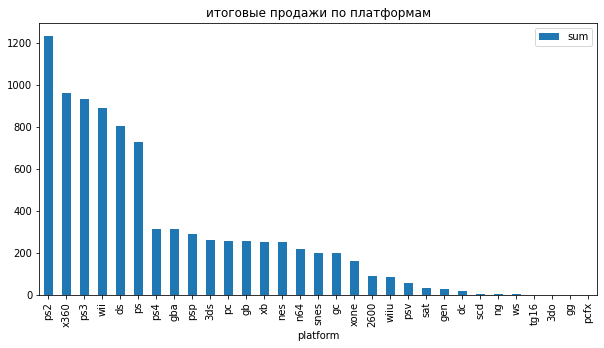

In [32]:
platform_distribution.plot(kind='bar', figsize=(10, 5), title='итоговые продажи по платформам');

**Вывод:**
Можно увидеть, что у нас есть 6 явных лидеров, но при этом новейшие платформы не входят туда. Связанно это с тем, что платформы появились недавно и игр для них создано еще мало.

In [33]:
# Создадим таблицу с топ-6 платформ по прадажам
top_platform_distribution = platform_distribution.head(6).index

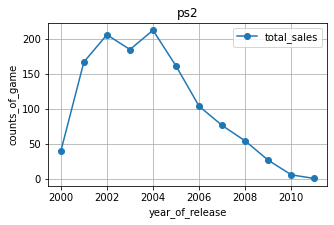

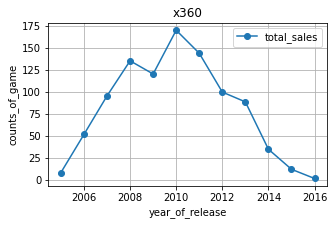

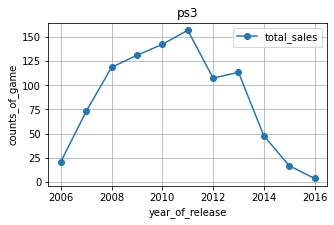

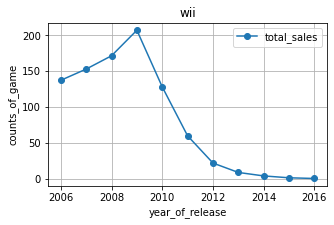

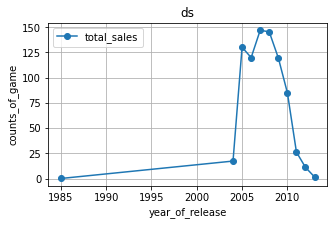

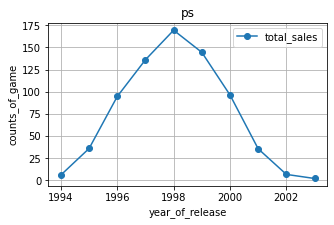

In [34]:
# Пройдемся циклом по списку топ-6 и построим график для каждой платформы
for platform_name in top_platform_distribution:
    pvt = ( 
        data
        .query('platform ==@platform_name')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))
        .plot(style='-o', title=platform_name, grid=True , ylabel='counts_of_game', figsize=(5, 3))
    )


**Вывод:**
Как можно заметить в среднем платформы живут  8-11 лет. При этом пик популярности платформы набирают через 4-6 лет с момента выхода.

**На графике DS видно аномальное значение. Дата выхода DS 2004. Если аномальное значение не несет критически важной информации, то удалим его.**

In [35]:
data[(data['platform'] == 'ds')&(data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,nr,0.02


In [36]:
# Удалим строку
data = data.drop(index=[15957], axis=0)

#### Определение актуального периода

**Исходя из предыдущих иследованний, актуальным временным интервалом для исследования будет период с 2014 по 2016. Т.к. данные нужны для прогноза критерий популярных в 2017 году игр, то разность прогнозируемого года и минимального значения актуального периода должна укладываться в пиковый интервал популярности платформ.**

In [37]:
#Актуализируем наши данные
data_filtered = data.query('year_of_release > 2013')

### Потенциально прибыльные платформы.

**Посмотрим платформы которые на 2015 все еще были актуальны. 2016 не учитываем т.к. данные за этот период не полные. Графики построем по неотфильтрованной таблице, для того чтобы увидеть год выпуска платформы.**

In [38]:
#Отбросим неактуальные данные
platform_actualy_2015 = data.query('year_of_release > 2014')

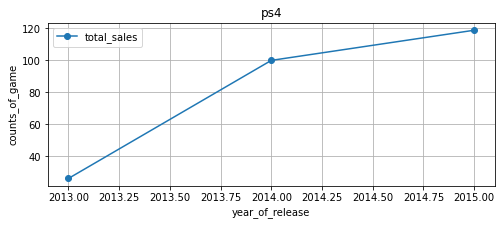

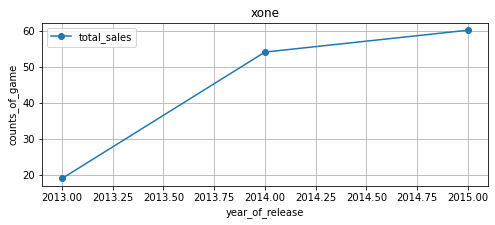

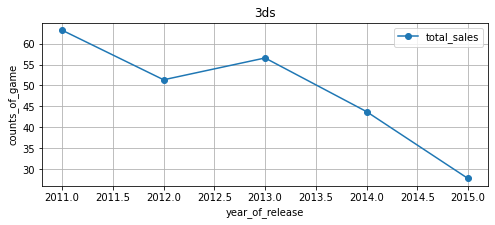

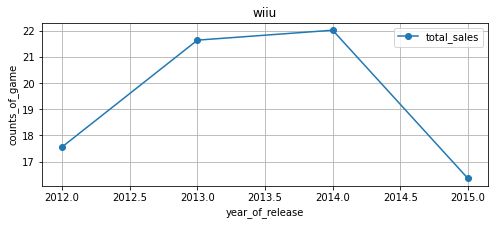

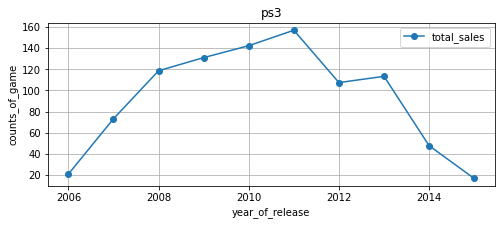

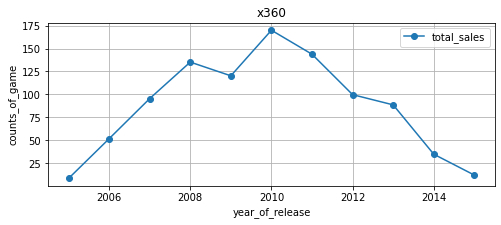

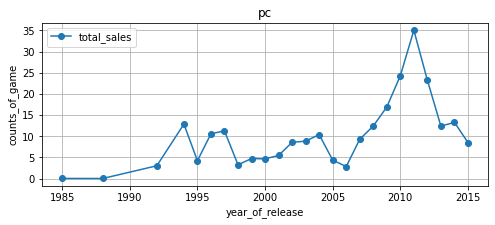

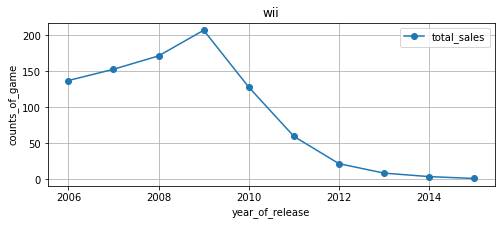

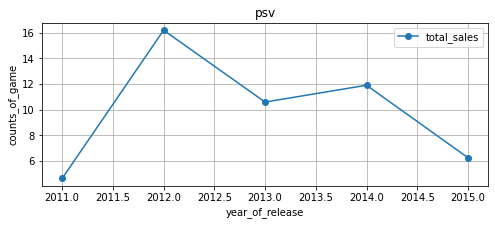

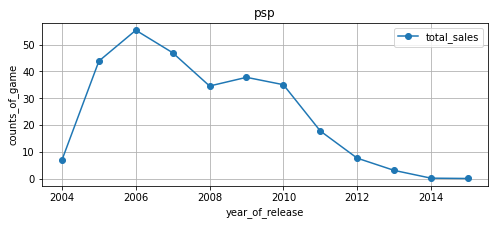

In [39]:
# Пройдемся циклом по списку актуальных платформ и построим график для каждой платформы
for platform_name in platform_actualy_2015['platform'].unique():
    pvt = ( 
        data
        .query('platform ==@platform_name and year_of_release < 2016 ')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))
        .plot(style='-o', title=platform_name, grid=True , ylabel='counts_of_game', figsize=(8, 3),
             )
    )

**Вывод:**

Как видно из графика потенциально прибыльными являются платформы: PS4, XOne, WiiU, 3DS, PC. PC хоть и имеет низкие показатели, но в отличии от других является модернизируемой платформой, что увеличивает ее срок функционирования и потенциал как игровой платформы. Для других платформ игры уже практически не выпускаются или же у них наблюдается резкий спад популярности.

### График размаха по глобальным продажам игр в разбивке по платформам

**Оценим прибыль с платформ помощью графика размаха.**

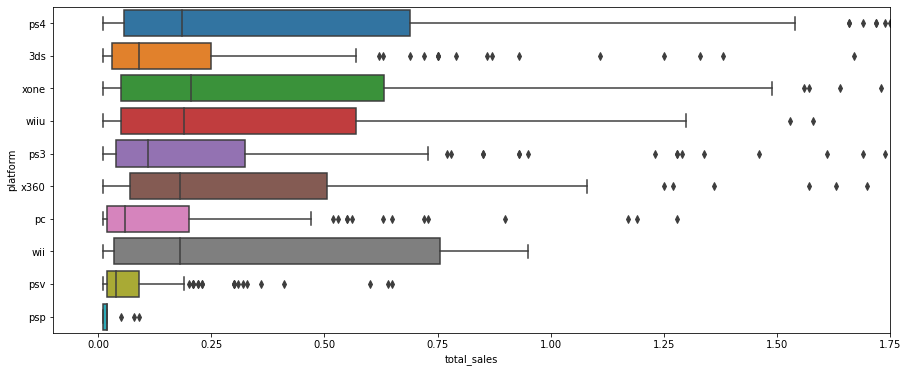

In [40]:
#График размаха с доверительным интервалом
plt.figure(figsize=(15, 6))
plt.xlim([-0.1, 1.75])
sns.boxplot(x='total_sales', y='platform', data=data_filtered, orient='h');

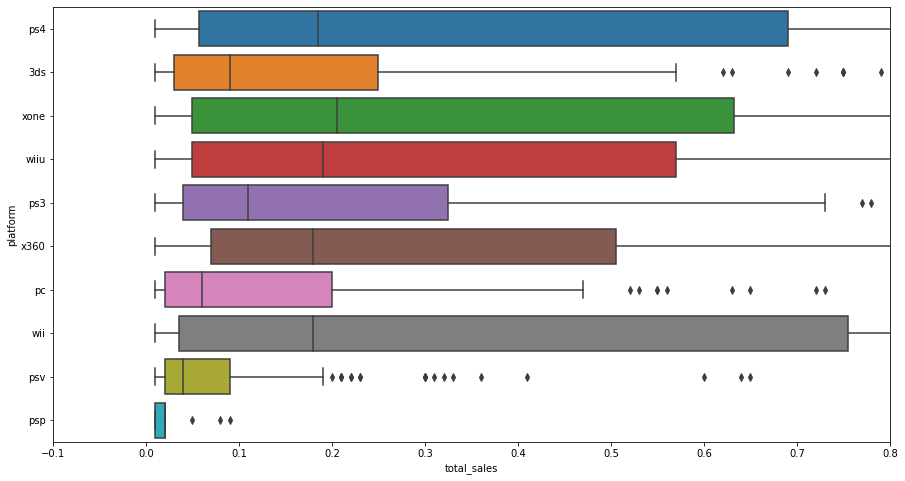

In [41]:
##График размаха увеличенный
plt.figure(figsize=(15, 8))
plt.xlim([-0.1, 0.8])
sns.boxplot(x='total_sales', y='platform', data=data_filtered, orient='h');

**Выводы:**

Платформы чей жизненный срок подошел к концу, мы не будем рассматривать.
Можно заметить, что доверитиельный интервал и интерквартильный размах больше y таких платформ,  как WiiU, PS4, XOne. Также их медианны имеют более высокое значение, приблизительно 180000 - 200000 проданных копий. Высокий первый квартиль, а соответственно и большая минимальная прибыль, у таких  платформ, как WiiU, PS4, XOne. 3DS хотя и была относена к потенциально прибыльным ранее, увы не прошла проверку на потенциальную прибыль.Также можно увидеть высокие показатели продаж, у такой старой платформы как Wii. Это позволяет нам  ожидать схожие по сумме продажы для более новой моделии WiiU. 


 ### Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.

**Построем графики, которые покажут зависимость цены внутри одной популярной платформы от отзывов пользователей и критиков. Посмотрим коэффициент корреляции.**

**Величина коэффициента корреляции по модулю**:
- 0 — нет никакой связи:
- 0.1–0.3 — слабая связь;
- 0.31–0.7 — умеренная связь;
- 0.71–0.99 — сильная связь;
- 1 — совершенная связь.
- Отрицательный коэффициент означает обратно пропорциональную связь.
- Положительный коэффициент означает прямо пропорциональную связь.

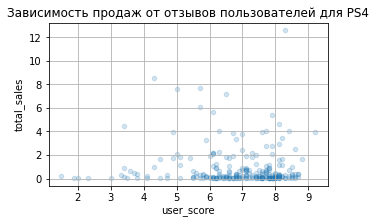

In [42]:
# Построем граффик рассеяния для PS3
(
    data_filtered
    .query('platform == "ps4"')
    .plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, figsize=(5, 3), \
          title='Зависимость продаж от отзывов пользователей для PS4', grid=True)
);

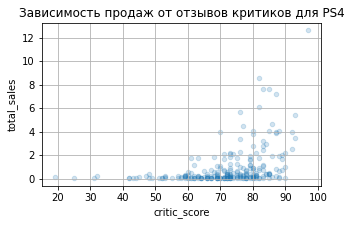

In [43]:
# Построем граффик рассеяния для PS3
(
    data_filtered
    .query('platform == "ps4"')
    .plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2, figsize=(5, 3),\
          title='Зависимость продаж от отзывов критиков для PS4', grid=True)
);

In [44]:
# Посмотрим коэффициент корреляции Пирсона
(
    data_filtered
    .query('platform == "ps4"')
    .pivot_table(index='total_sales', values=['user_score', 'critic_score'])
    .reset_index()
    .corr()
)

,total_sales,critic_score,user_score
total_sales,1.000000,0.504182,-0.107756
critic_score,0.504182,1.000000,0.442523
user_score,-0.107756,0.442523,1.000000


**Выводы:**

Связь между продажами и оценкой критиков умеренная, коэффициент корреляции положительный и  составляет: 0,5. 
Связь между продажами и оценкой пользователей слабая, можно считать что ее нет.

#### Платформа WiiU

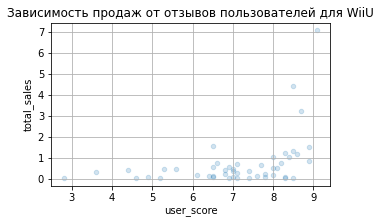

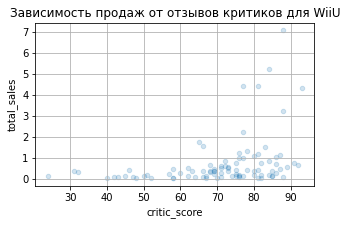

In [45]:
# Построем граффики рассеяния 
(
    data_filtered
    .query('platform == "wiiu"')
    .plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, figsize=(5, 3), \
          title=f'Зависимость продаж от отзывов пользователей для WiiU', grid=True)
);
(
    data
    .query('platform == "wiiu"')
    .plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2, figsize=(5, 3),\
          title=f'Зависимость продаж от отзывов критиков для WiiU', grid=True)
);

In [46]:
#Найдем корреляцию
(
    data_filtered
    .query('platform == "wiiu"')
    .pivot_table(index='total_sales', values=['user_score', 'critic_score'])
    .reset_index()
    .corr()
)

,total_sales,critic_score,user_score
total_sales,1.000000,0.414695,0.463330
critic_score,0.414695,1.000000,0.731437
user_score,0.463330,0.731437,1.000000


**Выводы:**

Связь между продажами и оценкой критиков умеренная, коэффициент корреляции положительный и  составляет: 0,41. 
Связь между продажами и оценкой пользователей умеренная, коэффициент корреляции положительный и  составляет: 0,46.


#### Платформа 3DS

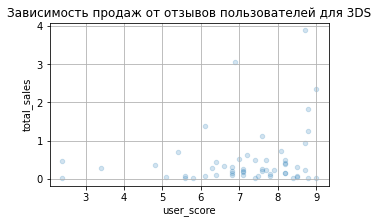

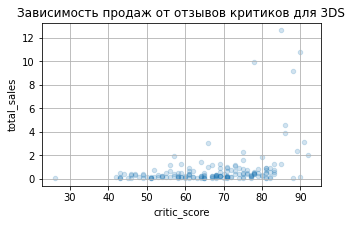

In [47]:
# Построем граффики рассеяния 
(
    data_filtered
    .query('platform == "3ds"')
    .plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, figsize=(5, 3), \
          title=f'Зависимость продаж от отзывов пользователей для 3DS', grid=True)
);
(
    data
    .query('platform == "3ds"')
    .plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2, figsize=(5, 3),\
          title=f'Зависимость продаж от отзывов критиков для 3DS', grid=True)
);

In [48]:
#Найдем корреляцию
(
    data_filtered
    .query('platform == "3ds"')
    .pivot_table(index='total_sales', values=['user_score', 'critic_score'])
    .reset_index()
    .corr()
)

,total_sales,critic_score,user_score
total_sales,1.000000,0.326279,0.246041
critic_score,0.326279,1.000000,0.753117
user_score,0.246041,0.753117,1.000000


**Выводы:**

Связь между продажами и оценкой критиков умеренная, коэффициент корреляции положительный и  составляет: 0,32. 
Связь между продажами и оценкой пользователей слабая, коэффициент корреляции положительный и  составляет: 0,24.
Такая же связь, как и у WiiU. Обе платформы от одного разработчика. Подозрение о связи такого коэффициента  с основным регионом распространения игр увеличивается.

#### Платформа XOne

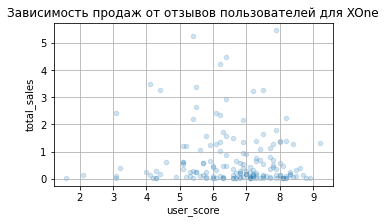

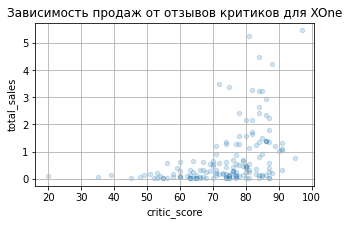

In [49]:
# Построем граффики рассеяния 
(
    data_filtered
    .query('platform == "xone"')
    .plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, figsize=(5, 3), \
          title=f'Зависимость продаж от отзывов пользователей для XOne', grid=True)
);
(
    data_filtered
    .query('platform == "xone"')
    .plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2, figsize=(5, 3),\
          title=f'Зависимость продаж от отзывов критиков для XOne', grid=True)
);

In [50]:
#Найдем корреляцию
(
    data_filtered
    .query('platform == "xone"')
    .pivot_table(index='total_sales', values=['user_score', 'critic_score'])
    .reset_index()
    .corr()
)

,total_sales,critic_score,user_score
total_sales,1.000000,0.462411,-0.076092
critic_score,0.462411,1.000000,0.462882
user_score,-0.076092,0.462882,1.000000


**Выводы:**

Связь между продажами и оценкой критиков умеренная, коэффициент корреляции положительный и  составляет: 0,46. 
Связь между продажами и оценкой пользователей слабая, коэффициент отрицательный и равен: -0,07.
Такае же связь, как и у PS4

#### Платформа PC

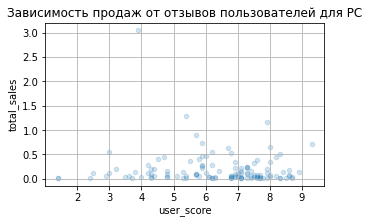

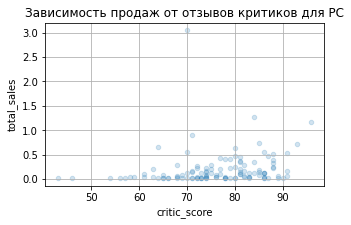

In [51]:
# Построем граффики рассеяния 
(
    data_filtered
    .query('platform == "pc"')
    .plot(kind='scatter', x='user_score', y='total_sales', alpha=0.2, figsize=(5, 3), \
          title=f'Зависимость продаж от отзывов пользователей для PC', grid=True)
);
(
    data_filtered
    .query('platform == "pc"')
    .plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.2, figsize=(5, 3),\
          title=f'Зависимость продаж от отзывов критиков для PC', grid=True)
);

In [52]:
#Найдем корреляцию
(
    data_filtered
    .query('platform == "pc"')
    .pivot_table(index='total_sales', values=['user_score', 'critic_score'])
    .reset_index()
    .corr()
)

,total_sales,critic_score,user_score
total_sales,1.000000,0.05414,-0.173454
critic_score,0.054140,1.00000,0.469330
user_score,-0.173454,0.46933,1.000000


**Выводы:**

Связь между продажами и оценкой критиков слабая коэффициент корреляции положительный и  составляет: 0,05. 
Связь между продажами и оценкой пользователей слабая, коэффициент отрицательный и равен: 0.17.

#### Выводы

**В большинстве случаев наблюдается умеренная положительная связь между ростом продаж и оценкой критиков. Оценки же пользователей слабо влияют на продажи, при этом оценки сильно колеблются взависимости от платформы. Хотя связь мжеду оценками критиков и продажами умеренная, но значения коэффициента ближе к слабой связи. На основе этого можно сказать, что оценки критиков не сильно влияют на продажи. К сожелению, мы не сможем оценить какие действия больше всего  повлияли на рост продаж, нехватает данных**

### Распределение игр по жанрам

**Узнаем игр какого жанра больше всего на рынке**

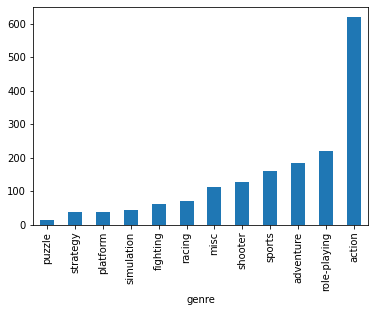

In [53]:
data_filtered.groupby('genre')['total_sales'].agg('count').sort_values().plot(kind='bar');

**Вывод:** Больше всего на рынке преобладают такие жанрв, как Action, Role-Playing, Adventure, Sports, Shooter. Причем отрыв между первым и вторым местом колоссальный. 

**Узнаем игры какого жанра больше всего продаются**

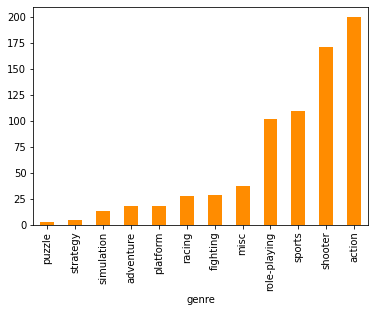

In [54]:
data_filtered.groupby('genre')['total_sales'].agg('sum').sort_values().plot(kind='bar', color='darkorange');

**Вывод:**
Лучше всего продаются игры жанра Action, Shooter, Role-Playing, Sports, Misc. Наиболее популярны игры требующего от игрока активных действий. Менее популярны игры требующие от игрока вдумчивых решений и интеллектуальных усилий.

**Нарисуем график размаха и проанализируем прибыль в зависимости от жанров. Посмотрим насколько подтвердятся первичные предположения.**

In [55]:
# Описание жанров
data_filtered.groupby('genre')['total_sales'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
role-playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05
action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09


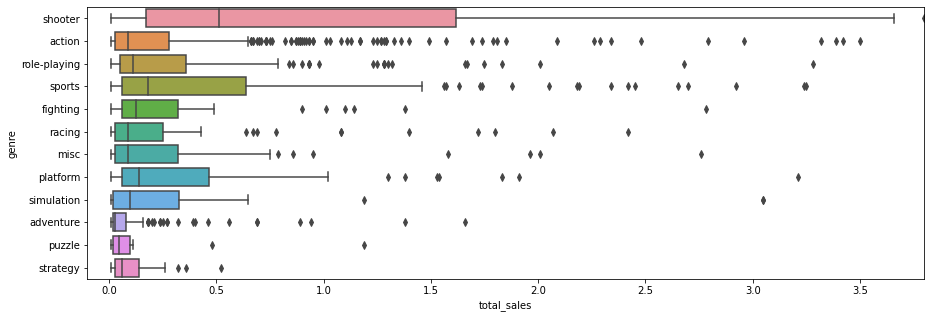

In [56]:
plt.figure(figsize=(15, 5))
plt.xlim([-0.1, 3.8])
sns.boxplot(x='total_sales', y='genre', data=data_filtered, orient='h');

**Выводы:**

Сразу же бросается в глаза жанр shooter. Доверительный интервал достигает до 3.5 млн. 1-й квартиль достигает 0.17 млн., это означает, что 75% прибыли выше данной суммы. Также 50% прибыли больше 0,51 млн., и 25% прибыли больше 1,61 млн. Таким образом можно расчитывать на прибыль до 1,6 млн с игр данного жанра.

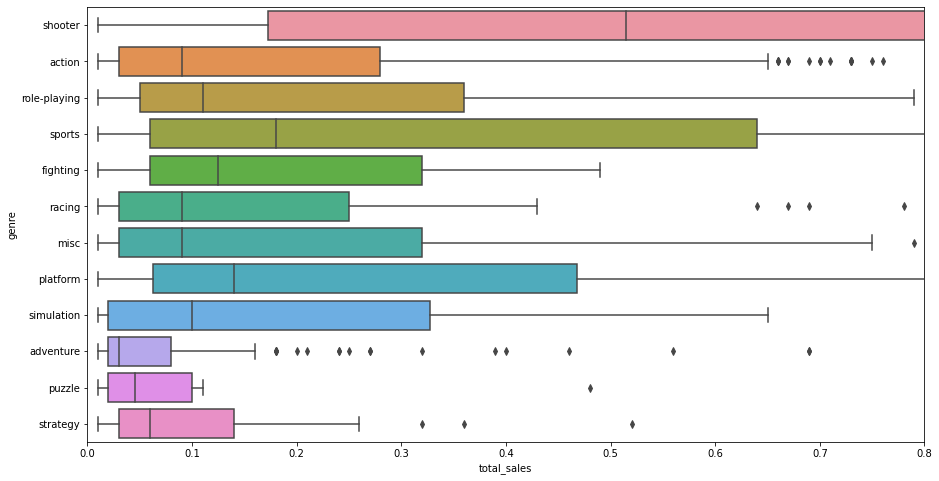

In [57]:
#Посмотрим поближе на остальные жанры
plt.figure(figsize=(15, 8))
plt.xlim([0, 0.8])
sns.boxplot(x='total_sales', y='genre', data=data_filtered, orient='h');

**Выводы:**
Жанры по которым кодичество значений составляет меньше 100 не учитываются в анализе.

На втором месте у нас игры жанра спорт, с доверительным интервалом до 1,4млн. 1-й квартиль равен примерно 0,06 млн. проданных копий.
Медианна равна 0,18млн., и 3-й квартиль равен 0,64млн. То есть можно ожидать прибыль до 0,64 млн. с проданных копий игр данного жанра.

На третьем месте  жанр role_playing. 1-й квартиль равен примерно 0,05 млн. проданных копий.
Медианна равна 0,11млн., и 3-й квартиль равен 0,36млн. То есть можно ожидать прибыль до 0,36 млн. с проданных копий игр данного жанра.

На четвертом месте  жанр misc. 1-й квартиль равен примерно 0,03 млн. проданных копий.
Медианна равна 0,09млн., и 3-й квартиль равен 0,32млн. То есть можно ожидать прибыль до 0,32 млн. с проданных копий игр данного жанра.

На пятом месте  жанр action. 1-й квартиль равен примерно 0,03 млн. проданных копий.
Медианна равна 0,09млн., и 3-й квартиль равен 0,28млн. То есть можно ожидать прибыль до 0,28 млн. с проданных копий игр данного жанра.

Дельта между средним и меддианным значением для этих жанров колеблется от 0.03 до 0.04. При этом данные подверженны большому количеству выбросов, благодаря чему у отдельных игр сумма продаж более 10 млн. копий.

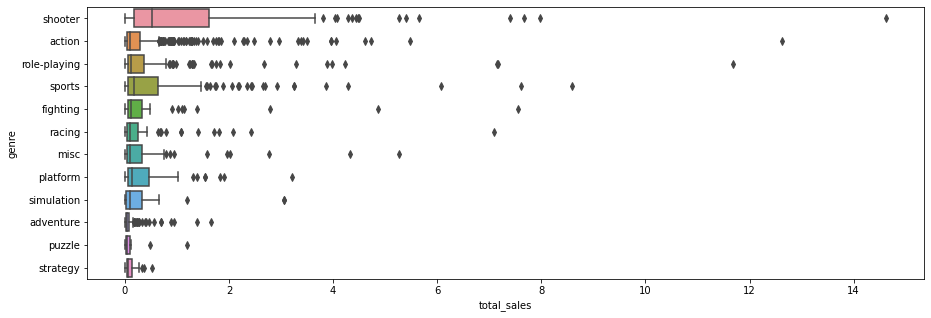

In [58]:
# check

plt.figure(figsize=(15, 5))
# plt.xlim([-0.1, 3.8])
sns.boxplot(x='total_sales', y='genre', data=data_filtered, orient='h');

### Выводы по анализу:

**В ходе исследования были получены следующие результаты:**
- Большое количество игр выпускалось после 2000-го года. Больше всего игр было выпущено с 2006 по 2011 год. С 1995 по 2008 был рост продаж и игровой продукции, после 2008 начался спад.
- В среднем платформы живут по 8-11 лет. При этом пик популярности платформы набирают через 4-6 лет с момента выхода.
- Потенциально прибыльными являются платформы: PS4, XOne, WiiU, 3DS, PC. PC хоть и имеет низкие показатели, но в отличии от других является модернизируемой платформой, что увеличивает ее срок функционирования и потенциал как игровой платформы. Для других платформ игры уже практически не выпускаются или же у них наблюдается резкий спад популярности.
-  Высокий первый квартиль, а соответственно и большая минимальная прибыль, у таких платформ, как WiiU, PS4, XOne. 3DS хотя и была относена к потенциально прибыльным ранее, увы не прошла проверку на потенциальную прибыль.
- Лучше всего продаются игры жанра Action, Shooter, Role-Playing, Sports, Misc. Наиболее популярны игры требующего от игрока активных действий. Менее популярны игры требующие от игрока вдумчивых решений и интеллектуальных усилий.
- В большинстве случаев наблюдается умеренная положительная связь между ростом продаж и оценкой критиков. Оценки же пользователей слабо влияют на продажи, при этом оценки сильно колеблются взависимости от платформы. Хотя связь между оценками критиков и продажами умеренная, но значения коэффициента ближе к слабой связи. На основе этого можно сказать, что оценки критиков не сильно влияют на продажи.

## Портрет пользователя каждого региона

**Определим портрет пользователя для каждого региона. Это позволит определить какие игры и для каких платформ будут актуальны в разных регионах.**

- NA — Северная Америка 
- EU —  Европа 
- JP —  Япония

#### Топ-5 популярных платформ для каждого региона (NA, EU, JP)

In [59]:
# Функция отсеивающая непопулярные значения
def pop_filter(row, x1, x2, x3, x4, x5):
    popular = [x1, x2, x3, x4, x5]
    if row not in popular:
        row = 'other'
    return row

In [60]:
#Сгруппируем данные по платформам и регионам
pop_filter_na = data_filtered.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False).reset_index()
pop_filter_eu = data_filtered.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False).reset_index()
pop_filter_jp = data_filtered.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False).reset_index()

#Найдем топ-5 плотформ для каждого региона
pop_platform_na = list(pop_filter_na['platform'].head(5))
pop_platform_eu = list(pop_filter_eu['platform'].head(5))
pop_platform_jp = list(pop_filter_jp['platform'].head(5))

In [61]:
#Применим функцию 
pop_filter_na['platform'] = pop_filter_na['platform'].apply(pop_filter, args=pop_platform_na)
pop_filter_eu['platform'] = pop_filter_eu['platform'].apply(pop_filter, args=pop_platform_eu)
pop_filter_jp['platform'] = pop_filter_jp['platform'].apply(pop_filter, args=pop_platform_jp)

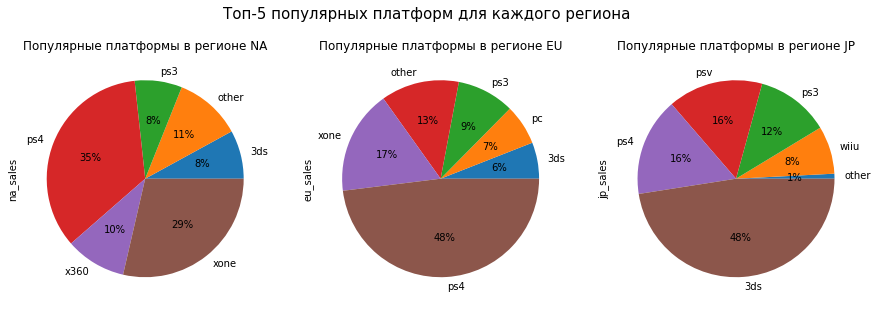

In [62]:
plt.suptitle('Топ-5 популярных платформ для каждого региона', fontsize=15)

# Сгруппируем данные по платформам  и построим столбчатую диаграмму 
plt.subplot(1, 3, 1)
(pop_filter_na
 .groupby('platform')['na_sales']
 .agg('sum')
 .plot(kind='pie', title='Популярные платформы в регионе NA', figsize=(15, 5), autopct='%1.0f%%')
);

# Сгруппируем данные по платформам и построим столбчатую диаграмму 
plt.subplot(1, 3, 2)
(pop_filter_eu
 .groupby('platform')['eu_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie', title='Популярные платформы в регионе EU', autopct='%1.0f%%')
);

# Сгруппируем данные по платформам и построим столбчатую диаграмму 
plt.subplot(1, 3, 3)
(pop_filter_jp
 .groupby('platform')['jp_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie', title='Популярные платформы в регионе JP', autopct='%1.0f%%')
);

**Выводы:** 
- **Распределение платформ по прадажам в Северной Америке**:
    1. PS4 - 35% доли рынка 
    2. XOne -29% доли рынка
    3. Other - 11% доли рынка
    4. X360 -10% доли рынка
    5. 3DS, PS3  - 8% доли рынка у обоих

**Основываясь на предыдущих исследованиях платформы Х360, PS3, Other, 3DS отбрасываем из потенциально популярных. В данном регионе лучше вложиться в PS4 и XОne**
 
- **Распределение платформ по прадажам в Европе**:
    1. PS4 - 48% доли рынка 
    2. XOne -17% доли рынка
    3. Other - 13% доли рынка
    4. PS3 - 9% доли рынка
    5. PC  - 7% доли рынка 
    6.3DS - 6% доли рынка

**Основываясь на предыдущих исследованиях платформы РС, PS3, Other, 3DS отбрасываем из потенциально популярных. В данном регионе лучше вложиться в PS4 и XОne**
    
- **Распределение платформ по прадажам в Японии**:
    1. 3DS - 48% доли рынка 
    1. PSV, PS4- 16% доли рынка
    1. PS3 - 12% доли рынка
    1. WiiU - 8% доли рынка
    1. Other - 1% доли рынка
    
**Для данного региона рекомендуется наоборот вложиться в 3DS, т.к. его игры занимают почти половину рынка. Также стоит вложиться в PS4, WiiU. Для данного региона характерна любовь к портативным платформам.**

#### Топ-5 популярных жанров  для каждого региона (NA, EU, JP):

In [63]:
#Сгруппируем данные по жанрам и регионам
genre_filter_na = data_filtered.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False).reset_index()
genre_filter_eu = data_filtered.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False).reset_index()
genre_filter_jp = data_filtered.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False).reset_index()

#Найдем топ-5 жанров для каждого региона
pop_genre_na = list(genre_filter_na['genre'].head(5))
pop_genre_eu = list(genre_filter_eu['genre'].head(5))
pop_genre_jp = list(genre_filter_jp['genre'].head(5))

In [64]:
#Применим функцию 
genre_filter_na['genre'] = genre_filter_na['genre'].apply(pop_filter, args=pop_genre_na)
genre_filter_eu['genre'] = genre_filter_eu['genre'].apply(pop_filter, args=pop_genre_eu)
genre_filter_jp['genre'] = genre_filter_jp['genre'].apply(pop_filter, args=pop_genre_jp)

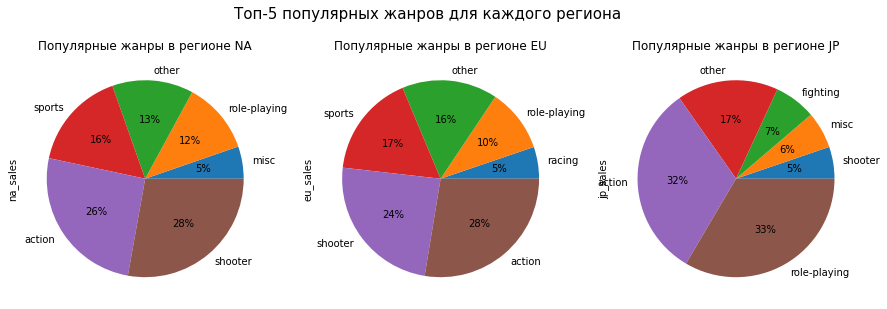

In [65]:
plt.suptitle('Топ-5 популярных жанров для каждого региона', fontsize=15)
# Сгруппируем данные по жанрам и построим столбчатую диаграмму 
plt.subplot(1, 3, 1)
(genre_filter_na
 .groupby('genre')['na_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie', title='Популярные жанры в регионе NA', figsize=(15, 5), autopct='%1.0f%%')
);

# Сгруппируем данные по жанрам и построим столбчатую диаграмму 
plt.subplot(1, 3, 2)
(genre_filter_eu
 .groupby('genre')['eu_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie', title='Популярные жанры в регионе EU', autopct='%1.0f%%')
);

# Сгруппируем данные по жанрам и построим столбчатую диаграмму
plt.subplot(1, 3, 3)
(genre_filter_jp
 .groupby('genre')['jp_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie',  title='Популярные жанры в регионе JP', autopct='%1.0f%%')
);

**Выводы:** 
- **Распределение игровых жанров по прадажам в Северной Америке**:
    1. Shooter - 28% доли рынка 
    2. Action -26% доли рынка
    3. Sports - 16% доли рынка
    4. Other - 13% доли рынка
    5. Role-Playing - 12% доли рынка у обоих
    6. Misc - 5%

**В данном регионе лучше вложиться в жанры: Shooter, Action, Sports, Role-Playing**
 
- **Распределение игровых жанров по прадажам в Европе**:
    1. Action - 28% доли рынка 
    2. Shooter -24% доли рынка
    3. Sports - 17% доли рынка
    4. Other - 16% доли рынка
    5. Role-playing  - 10% доли рынка 
    6. Racing - 6% доли рынка

**В данном регионе тоже стоит вложиться в жанры: Shooter, Action, Sports, Role-Playing**
    
- **Распределение игровых жанров по прадажам в Японии**:
    1. Role-playing  - 33% доли рынка 
    1. Action - 32% доли рынка
    1. Other - 17% доли рынка
    1. Fighting - 7% доли рынка
    1. Misc - 6%  доли рынка
    1. Shooter - 5% доли рынка
    
**Для данного региона рекомендуется вложиться в игры жанра: Role-playing, Action, Fighting и Misc.**

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
👍

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.
Обозначения которые используются в данном исследовании:**
- E («Everyone») — «Для всех»
- E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
- T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
- M («Mature») — «Для взрослых»

In [66]:
# Псомотрим общее описание продаж по рейтингам
data_filtered.groupby('rating')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
E,219.0,0.607900,1.198769,0.01,0.03,0.12,0.590,8.58
E10+,185.0,0.387459,0.545624,0.01,0.09,0.24,0.490,4.44
M,265.0,0.854868,1.429999,0.01,0.08,0.28,0.970,12.62
T,271.0,0.365793,0.768845,0.01,0.05,0.13,0.305,5.64
nr,749.0,0.265648,0.993821,0.01,0.02,0.05,0.140,14.63


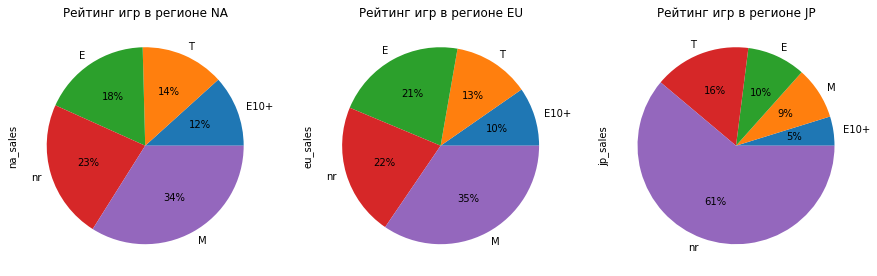

In [67]:
# Сгруппируем данные по рейтингу и построим столбчатую диаграмму
plt.subplot(1, 3, 1)
(data_filtered
 .groupby('rating')['na_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie', title='Рейтинг игр в регионе NA', figsize=(15, 5), autopct='%1.0f%%'));

# Сгруппируем данные по рейтингу и построим столбчатую диаграмму 
plt.subplot(1, 3, 2)
(data_filtered
 .groupby('rating')['eu_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie', title='Рейтинг игр в регионе EU', figsize=(15, 5), autopct='%1.0f%%'));

# Сгруппируем данные по рейтингу и построим столбчатую диаграмму 
plt.subplot(1, 3, 3)
(data_filtered
 .groupby('rating')['jp_sales']
 .agg('sum')
 .sort_values()
 .plot(kind='pie', title='Рейтинг игр в регионе JP', figsize=(15, 5), autopct='%1.0f%%'));

**Выводы:**

В Северной Америке больше всего продаются игры с рейтингом **M** - 34%. На втором месте игры **без рейтинга** - 23%. На третьем с рейтингом **E** - 18%


В Eвропе ситуация анологична с Северной Америкой .Больше всего продаются игры с рейтингом **M** - 35%. На втором месте игры **без рейтинга** - 22%. На третьем с рейтингом **E** - 21%. Небольшое отличие лишь в том, что разрыв между первым и вторым местом минимален.


В Японии больше всего покупают игры **без рейтинга** - 61%. Связано это с тем что компания ESRB обеспечивает определение рейтингов в основном для  США и Канады. На втором месте игры с рейтингом **T(Teen)** - 16%. На третьем месте с рейтингом **Е** -10%

### Выводы:

**Портрет покупателя в Америке:**
- Платформы по убыванию доли на рынке : PS4;  XOne;  Other;  X360;  3DS; PS3 
- Жанры по убыванию доли на рынке : Shooter; Actions; Sports; Other; Role-Playing; Misc 
- Рейтинг по убыванию: M; без рейтинга; E; T; E10+

**В данном регионе лучше вложиться в плтформы: PS4 и XОne. В жанры: Shooter, Action, Sports, Role-Playing. И игры с рейтингом: M; без рейтинга; E**

**Портрет покупателя в Европе:**
- Платформы по убыванию доли на рынке : PS4;  XOne;  Other;  PS3;  PC; 3DS 
- Жанры по убыванию доли на рынке : Actions; Shooter;  Sports; Other; Role-Playing; Racing
- Рейтинг по убыванию: M; без рейтинга; E; T; E10+

**В данном регионе лучше вложиться в плтформы: PS4 и XОne. В жанры: Shooter, Action, Sports, Role-Playing. И игры с рейтингом: M; без рейтинга; E**    

**Портрет покупателя в Японии:**
- Платформы по убыванию доли на рынке : 3DS; PSV; PS4; PS3; WiiU; 
- Жанры по убыванию доли на рынке : Role-Playing; Actions; Other;  Fighting; Misc; Shooter;   
- Рейтинг по убыванию: без рейтинга; T;  E; M; E10+

**В данном регионе лучше вложиться в плтформы: 3DS, PS4 и WiiU. В жанры: Role-playing, Action, Fighting и Misc. И игры с рейтингом: без рейтинга; T, E**     


## Проверка гипотез

**Для проверки в исследовании были видвинуты две гипотезы:**
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**
- **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяют
метод `scipy.stats.ttest_ind()`**. 


### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Сформулируем нулевую(H_0) и альтернативную(H_1) гипотезы:**

    1. H_0: Средние пользовательские рейтинги платформы Xbox One = Средним пользовательским рейтингам платформы PC
    2. H_1: Средние пользовательские рейтинги платформы Xbox One ≠ Средним пользовательским рейтингам платформы PC

H_0 всегда формулируется так, чтобы использовать знак равенства. Исходя из H_0 формулируется
альтернативная гипотеза H_1.


In [68]:
# Выборка пользовательских рейтингов для платформы ХОne
x_one_rating = data_filtered[(data_filtered['platform'] == "xone")&(data_filtered['user_score'].notna())]['user_score']

# Выборка пользовательских рейтингов для платформы PC
pc_rating = data_filtered[(data_filtered['platform'] == "pc")&(data_filtered['user_score'].notna())]['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(x_one_rating, pc_rating, equal_var=False)
# alpha значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


**p-value** - это вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна.

 **Уровень значимости alpha** — это суммарная вероятность того, что измеренное эмпирически значение окажется далеко от
среднего. 

**Вывод:**
Средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC

In [69]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Гипотеза:Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Сформулируем нулевую(H_0) и альтернативную(H_1) гипотезы:**

    1. H_0: Средние пользовательские рейтинги жанров Action = Средним пользовательским рейтингам жанров Sports
    2. H_1:  Средние пользовательские рейтинги жанров Action ≠ Средним пользовательским рейтингам жанров Sports

In [70]:
# Выборка пользовательских рейтингов для жанра Action
action_rating = data_filtered[(data_filtered['genre'] == "action")&(data_filtered['user_score'].notna())]['user_score']

# Выборка пользовательских рейтингов для  жанра Sports
sports_rating = data_filtered[(data_filtered['genre'] == "sports")&(data_filtered['user_score'].notna())]['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(action_rating, sports_rating, equal_var=False)

# alpha  значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Общий вывод

**Что было сделано:**

   Входе исследования были выявлены и отработаны пропущенные значения в данных. В ходе данного исследования мы определили     потенциально прибыльные платформы. Узнали как влияют оценки критиков и пользователей на продаваемость игр. Определили популярные среди игроков жанры. За какой характерный срок появляются новые и исчезают старые платформы. Определили портрет пользователя для каждого региона. Проверили следующие гипотезы:
   1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**В ходе исследования были получены следующие результаты:**
- Большое количество игр выпускалось после 2000-го года. Больше всего игр было выпущено с 2006 по 2011 год. С 1995 по 2008 был рост продаж и игровой продукции. После 2008 начался спад.
- В среднем платформы живут по 8-11 лет. При этом пик популярности платформы набирают через 4-6 лет с момента выхода.
- Потенциально прибыльными являются платформы: **PS4, XOne,  3DS,  WiiU, PC**. **PC** хоть и имеет низкие показатели, но в отличии от других является модернизируемой платформой, что увеличивает ее срок функционирования и потенциал как игровой платформы. Для других платформ игры уже практически не выпускаются.
-  Высокий первый квартиль, а соответственно и большая минимальная прибыль, у таких платформ, как **WiiU, PS4, XOne. 3DS** хотя и была относена к потенциально прибыльным ранее, увы не прошла проверку на потенциальную прибыль.
- Лучше всего продаются игры жанра: **Action, Shooter, Role-Playing, Sports, Misc**. Наиболее популярны игры требующего от игрока активных действий. Менее популярны игры требующие от игрока вдумчивых решений и интеллектуальных усилий.
- В большинстве случаев наблюдается умеренная положительная связь между ростом продаж и оценкой критиков. Оценки же пользователей слабо влияют на продажи, при этом оценки сильно колеблются взависимости от платформы. Хотя связь мжеду оценками критиков и продажами умеренная, но значения коэффициента ближе к слабой связи. На основе этого можно сказать, что оценки критиков не сильно влияют на продажи.
- Средние пользовательские рейтинги платформы Xbox One равны средним пользовательским рейтингам платформы PC

**В зависимости от региона сбыта игр. Рекомендуются вложиться в игры со следующими характеристиками:**

 **Портрет покупателя в Америке:**
- Платформы по убыванию доли на рынке : **PS4 - 35%;  XOne - 29%;  Other - 11%;  X360 - 10%;  3DS - 8%; PS3 - 8%** 
- Жанры по убыванию доли на рынке : **Shooter - 28%; Actions - 26%; Sports - 16%; Other - 13%; Role-Playing - 12%; Misc - 5%** 
- Рейтинг по убыванию: **M - 34%; без рейтинга - 23%; E - 18%; T - 14%; E10+ - 12%**

**В данном регионе лучше вложиться в плтформы: PS4 и XОne. В жанры: Shooter, Action, Sports, Role-Playing. И игры с рейтингом: M; без рейтинга; E**

**Портрет покупателя в Европе:**
- Платформы по убыванию доли на рынке : **PS4 - 48%;  XOne - 17%;  Other - 13%;  PS3 - 9%;  PC - 7%; 3DS - 6%**
- Жанры по убыванию доли на рынке :**Actions - 26%; Shooter - 24%;  Sports - 17%; Other - 16%; Role-Playing - 10%; Racing - 5%**
- Рейтинг по убыванию: **M - 35%; без рейтинга - 22%; E - 21%; T - 13%; E10+ - 10%**

**В данном регионе лучше вложиться в плтформы: PS4 и XОne. В жанры: Shooter, Action, Sports, Role-Playing. И игры с рейтингом: M; без рейтинга; E**    

**Портрет покупателя в Японии:**
- Платформы по убыванию доли на рынке : **3DS - 48%; PSV - 16%; PS4 - 16%; PS3 - 12%; WiiU - 8%;** 
- Жанры по убыванию доли на рынке : **Role-Playing - 33%; Actions - 32%; Other - 17%;  Fighting - 7%; Misc - 6%; Shooter - 5%;**   
- Рейтинг по убыванию: **без рейтинга - 61%; T - 16%;  E - 10%; M - 9%; E10+ - 5%**

**В данном регионе лучше вложиться в плтформы: 3DS, PS4 и WiiU. В жанры: Role-playing, Action, Fighting . И игры с рейтингом: без рейтинга; T, E**     

   